In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)


len(cities)

595

In [13]:
# set up for loop counter
cities_count = len(cities)

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city


print("Beginning Data Retreival")
print("-----------------------------")


for i in range(cities_count):
    print(f"{cities[i]}.")
    params = {"q":cities[i],
                  "units":"imperial",
                "appid":weather_api_key}
    try:      
        response = requests.get(url, params=params)
        response_json = response.json()
    
        # read the json into the various lists
        City.append(response_json['name'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_Temp.append(response_json['main']['temp_max'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
-----------------------------
poum.
bluff.
road town.
rikitea.
jabinyanah.
alofi.
vaini.
punta arenas.
marcona.
City not found. Skipping...
korla.
khandyga.
bathsheba.
arraial do cabo.
mataura.
ostrow mazowiecka.
east london.
canandaigua.
tessalit.
cherskiy.
ushuaia.
nikolskoye.
sarkand.
albany.
hermanus.
hobart.
hailey.
upernavik.
vardo.
chuy.
castro.
svetlogorsk.
tabou.
kapaa.
yellowknife.
maceio.
dikson.
acapulco.
santa catarina de tepehuanes.
xai-xai.
torbay.
saint george.
morondava.
mutsamudu.
City not found. Skipping...
wadi musa.
meulaboh.
iqaluit.
new norfolk.
tromso.
atuona.
tuatapere.
komsomolskiy.
saldanha.
marawi.
vanavara.
raga.
shizunai.
cidreira.
tumannyy.
City not found. Skipping...
georgetown.
pevek.
rakaia.
mitsamiouli.
zhigansk.
port hardy.
nouadhibou.
manokwari.
cotonou.
lavrentiya.
avarua.
ponta do sol.
busselton.
tiksi.
samusu.
City not found. Skipping...
puerto ayora.
goryachegorsk.
kaitangata.
qaanaaq.
hithadhoo.
tuktoyaktuk.
clyde river

In [14]:
weather_dict = {
    "City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
    "Humidity" : Humidity, "Cloudiness": Cloudiness, "Windspeed": Wind_Speed,
    "Country": Country, "Date": Date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(600)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Poum,-20.23,164.02,73.67,72,100,7.18,NC,1589581064
1,Bluff,-46.60,168.33,47.37,79,66,10.65,NZ,1589581064
2,Road Town,18.42,-64.62,82.40,74,75,6.93,VG,1589581064
3,Rikitea,-23.12,-134.97,74.64,83,75,20.51,PF,1589581065
4,Djebeniana,35.03,10.91,71.60,56,20,5.82,TN,1589581065
...,...,...,...,...,...,...,...,...,...
539,Paamiut,61.99,-49.67,39.74,88,87,11.01,GL,1589581288
540,Bambanglipuro,-7.95,110.28,77.79,88,87,9.48,ID,1589581288
541,Ust-Tsilma,65.44,52.15,39.49,73,1,7.31,RU,1589581288
542,Boa Vista,2.82,-60.67,87.80,48,40,11.41,BR,1589581289


In [15]:
weather_data.to_csv('cities.csv', index = False)

In [16]:
len(weather_data)

544

In [17]:
humidity_data = weather_data.loc[weather_data['Humidity'] > 100]
len(humidity_data)

0

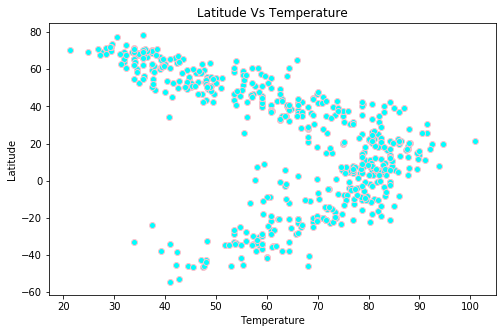

In [18]:

# Latitude vs. Temperature Plot
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude


fig, ax1 = plt.subplots(figsize=(8,5))

x_values = weather_data['Max Temp']
y_values = weather_data['Lat']

ax1.set_xlabel('Temperature')
ax1.set_ylabel('Latitude')
ax1.set_title('Latitude Vs Temperature')


plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')
plt.savefig("lat vs tem.png", bbox_inches='tight', dpi=600)
plt.show()

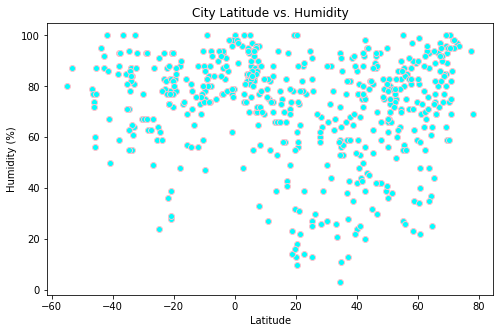

In [19]:
# Humidity (%) vs. Latitude
fig, ax2 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Humidity']
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('City Latitude vs. Humidity')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')
plt.savefig("lat vs hum.png", bbox_inches='tight', dpi=600)
plt.show()


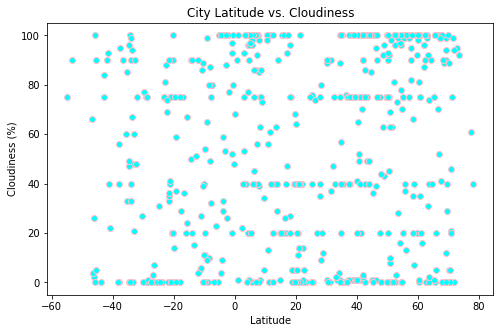

In [20]:
# Cloudiness (%) vs. Latitude
fig, ax3 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness (%)')
ax3.set_title('City Latitude vs. Cloudiness')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')
plt.savefig("lat vs cloudiness.png", bbox_inches='tight', dpi=600)
plt.show()


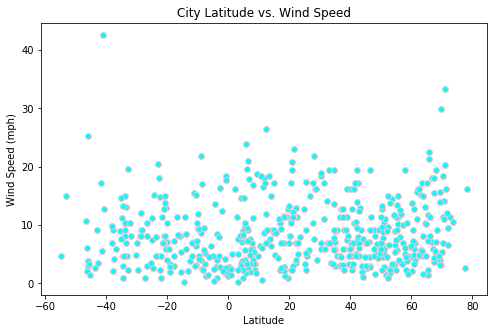

In [21]:
# Wind Speed (mph) vs. Latitude
fig, ax4 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Windspeed']
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Latitude vs. Wind Speed')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')
plt.savefig("lat vs windspeed.png", bbox_inches='tight', dpi=600)
plt.show()


In [22]:
#Your second requirement is to run linear regression on each relationship, 
#only this time separating them into 
#Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude):

North_data = weather_data[weather_data['Lat'] >= 0]
North_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
2,Road Town,18.42,-64.62,82.40,74,75,6.93,VG,1589581064
4,Djebeniana,35.03,10.91,71.60,56,20,5.82,TN,1589581065
8,Korla,41.76,86.15,70.00,75,100,5.01,CN,1589580955
9,Khandyga,62.67,135.60,47.23,67,0,4.76,RU,1589581072
10,Bathsheba,13.22,-59.52,84.20,66,40,18.34,BB,1589581072
...,...,...,...,...,...,...,...,...,...
537,Sept-Îles,50.20,-66.38,48.20,36,75,11.41,CA,1589581287
539,Paamiut,61.99,-49.67,39.74,88,87,11.01,GL,1589581288
541,Ust-Tsilma,65.44,52.15,39.49,73,1,7.31,RU,1589581288
542,Boa Vista,2.82,-60.67,87.80,48,40,11.41,BR,1589581289


In [23]:
South_data = weather_data[weather_data['Lat'] < 0]
South_data 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Poum,-20.23,164.02,73.67,72,100,7.18,NC,1589581064
1,Bluff,-46.60,168.33,47.37,79,66,10.65,NZ,1589581064
3,Rikitea,-23.12,-134.97,74.64,83,75,20.51,PF,1589581065
5,Alofi,-19.06,-169.92,82.40,78,37,3.36,NU,1589581065
6,Vaini,-21.20,-175.20,77.00,78,40,8.05,TO,1589580891
...,...,...,...,...,...,...,...,...,...
526,Bulungu,-4.55,18.60,72.10,84,4,2.46,CD,1589581284
529,Camacupa,-12.02,17.48,56.71,56,4,4.76,AO,1589581285
532,Kieta,-6.22,155.63,83.43,75,23,4.52,PG,1589581286
538,Angol,-37.80,-72.72,64.40,88,40,2.15,CL,1589581287


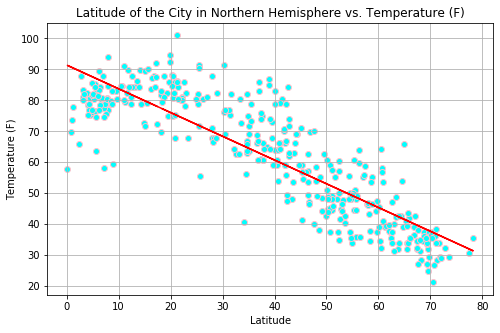

<Figure size 432x288 with 0 Axes>

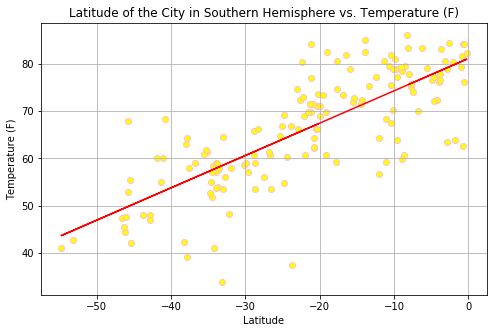

<Figure size 432x288 with 0 Axes>

In [24]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
fig, ax5 = plt.subplots(figsize=(8,5))

x_values = North_data['Lat']
y_values = North_data['Max Temp']
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Temperature (F)')
ax5.set_title('Latitude of the City in Northern Hemisphere vs. Temperature (F)')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.grid(True)
plt.show()
plt.savefig("Scatter_tempnorth.png", bbox_inches='tight', dpi=600)

# Southern Hemisphere - Temperature (F) vs. Latitude
fig, ax6 = plt.subplots(figsize=(8,5))

x_values = South_data['Lat']
y_values = South_data['Max Temp']
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Temperature (F)')
ax6.set_title('Latitude of the City in Southern Hemisphere vs. Temperature (F)')

plt.scatter(x_values, y_values,facecolors='yellow',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.show()
plt.savefig("Scatter_Temp.png", bbox_inches='tight', dpi=600)

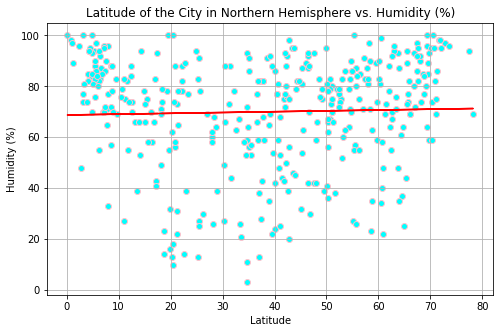

<Figure size 432x288 with 0 Axes>

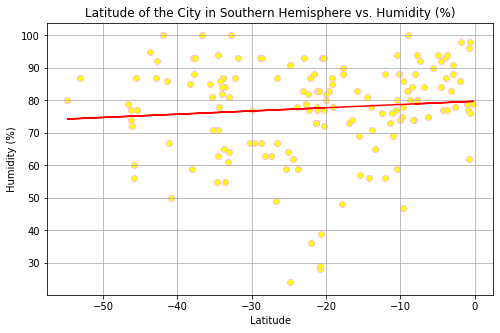

<Figure size 432x288 with 0 Axes>

In [25]:
#### # Northern Hemisphere - Humidity (%) vs. Latitude


fig, ax7 = plt.subplots(figsize=(8,5))

x_values = North_data['Lat']
y_values = North_data['Humidity']
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Humidity (%)')
ax7.set_title('Latitude of the City in Northern Hemisphere vs. Humidity (%)')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.grid(True)
plt.show()
plt.savefig("Scatter_northhum.png", bbox_inches='tight', dpi=600)


fig, ax8 = plt.subplots(figsize=(8,5))

x_values = South_data['Lat']
y_values = South_data['Humidity']
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Humidity (%)')
ax8.set_title('Latitude of the City in Southern Hemisphere vs. Humidity (%)')

plt.scatter(x_values, y_values,facecolors='yellow',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.show()
plt.savefig("Scatter_southhum.png", bbox_inches='tight', dpi=600)

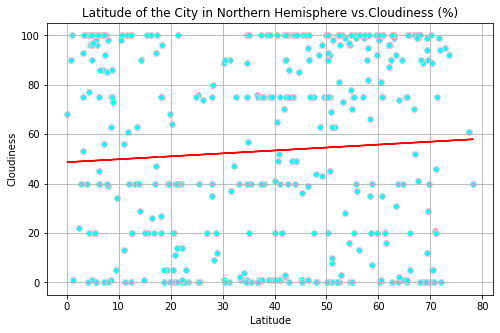

<Figure size 432x288 with 0 Axes>

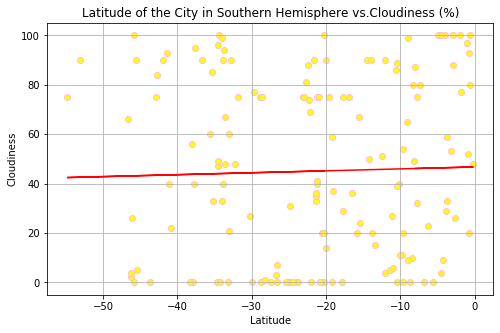

<Figure size 432x288 with 0 Axes>

In [26]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
fig, ax9 = plt.subplots(figsize=(8,5))

x_values = North_data['Lat']
y_values = North_data['Cloudiness']
ax9.set_xlabel('Latitude')
ax9.set_ylabel('Cloudiness')
ax9.set_title('Latitude of the City in Northern Hemisphere vs.Cloudiness (%)')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.grid(True)
plt.show()
plt.savefig("Scatter_northcloud.png", bbox_inches='tight', dpi=600)

# Southern Hemisphere -Humidity (%) vs. Latitude
fig, ax10 = plt.subplots(figsize=(8,5))

x_values = South_data['Lat']
y_values = South_data['Cloudiness']
ax10.set_xlabel('Latitude')
ax10.set_ylabel('Cloudiness')
ax10.set_title('Latitude of the City in Southern Hemisphere vs.Cloudiness (%)')

plt.scatter(x_values, y_values,facecolors='yellow',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.show()
plt.savefig("Scatter_southcloud.png", bbox_inches='tight', dpi=600)

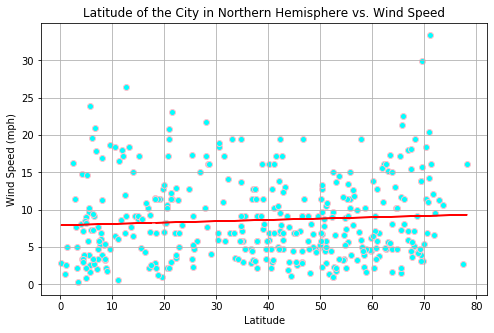

<Figure size 432x288 with 0 Axes>

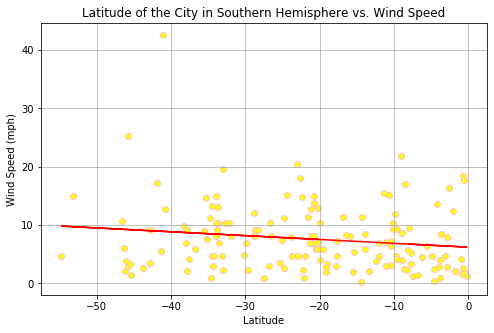

<Figure size 432x288 with 0 Axes>

In [27]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude


North_data = weather_data[weather_data['Lat'] >= 0]
South_data = weather_data[weather_data['Lat'] < 0]


fig, ax11 = plt.subplots(figsize=(8,5))

x_values = North_data['Lat']
y_values = North_data['Windspeed']
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Wind Speed (mph)')
ax11.set_title('Latitude of the City in Northern Hemisphere vs. Wind Speed')

plt.scatter(x_values, y_values,facecolors='cyan',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.show()
plt.savefig("Scatter_northwind.png", bbox_inches='tight', dpi=600)
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
fig, ax12 = plt.subplots(figsize=(8,5))

x_values = South_data['Lat']
y_values = South_data['Windspeed']
ax12.set_xlabel('Latitude')
ax12.set_ylabel('Wind Speed (mph)')
ax12.set_title('Latitude of the City in Southern Hemisphere vs. Wind Speed')

plt.scatter(x_values, y_values,facecolors='yellow',edgecolors='pink')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.grid(True)
plt.show()
plt.savefig("Scatter_southwind.png", bbox_inches='tight', dpi=600)